# Regressão linear com TensorFlow


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
weights: 64.05
bias: 70.23


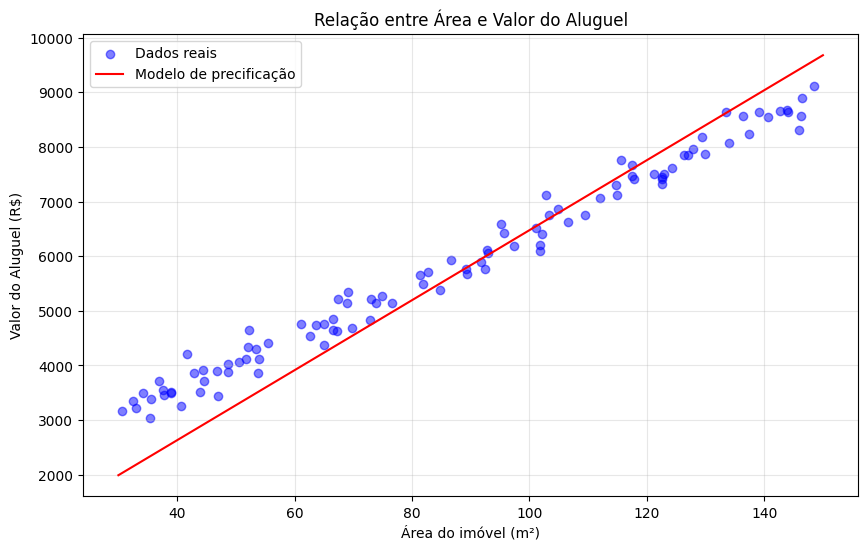

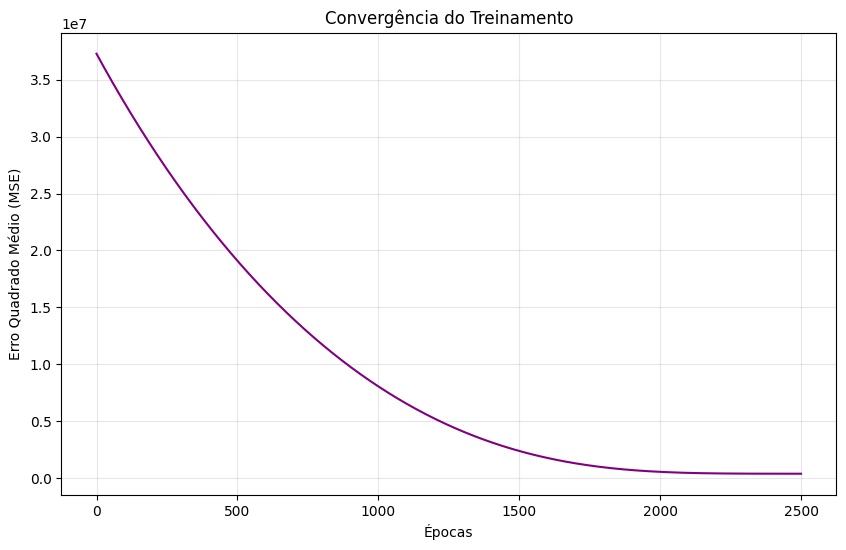

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Configuração de seeds para reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

# Gerando dados de área e preço de aluguel
X = 30 + 120 * np.random.rand(100, 1)  # Áreas entre 30m² e 150m²
y = 1500 + 50 * X + np.random.randn(100, 1) * 250  # Preço base + preço por m² + variação

# Construindo o modelo de regressão linear
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

# Compilação com Adam para melhor convergência
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Treinamento do modelo
history = model.fit(X, y, epochs=2500, verbose=0)

# Previsões para visualização da linha de regressão
X_range = np.linspace(30, 150, 100).reshape(-1, 1)
y_pred = model.predict(X_range)

# Coeficientes do modelo
weights, bias = model.layers[0].get_weights()
print(f"weights: {weights[0][0]:.2f}")
print(f"bias: {bias[0]:.2f}")

# Visualização do modelo e dados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Dados reais')
plt.plot(X_range, y_pred, color='red', label='Modelo de precificação')
plt.xlabel("Área do imóvel (m²)")
plt.ylabel("Valor do Aluguel (R$)")
plt.title("Relação entre Área e Valor do Aluguel")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualizando o histórico de perda
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='purple')
plt.xlabel("Épocas")
plt.ylabel("Erro Quadrado Médio (MSE)")
plt.title("Convergência do Treinamento")
plt.grid(True, alpha=0.3)
plt.show()

# Rede Neural como Aproximadora de Funções Não Lineares

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


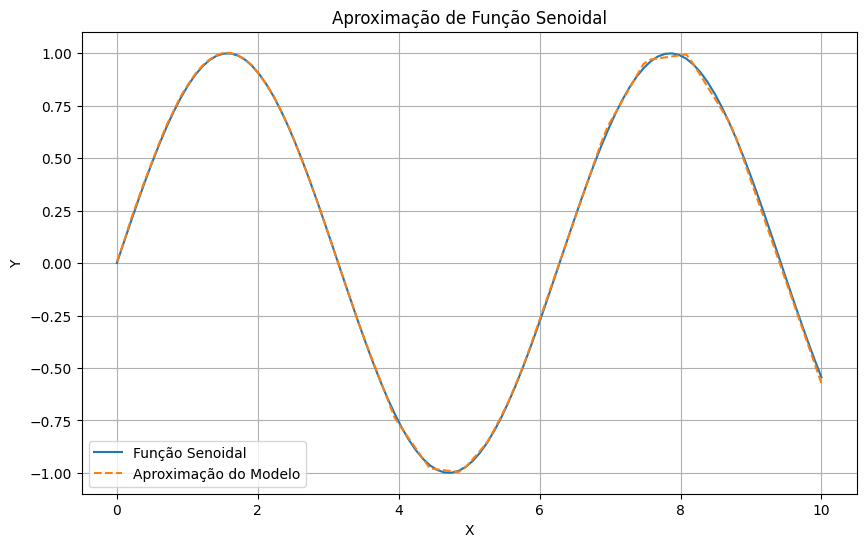

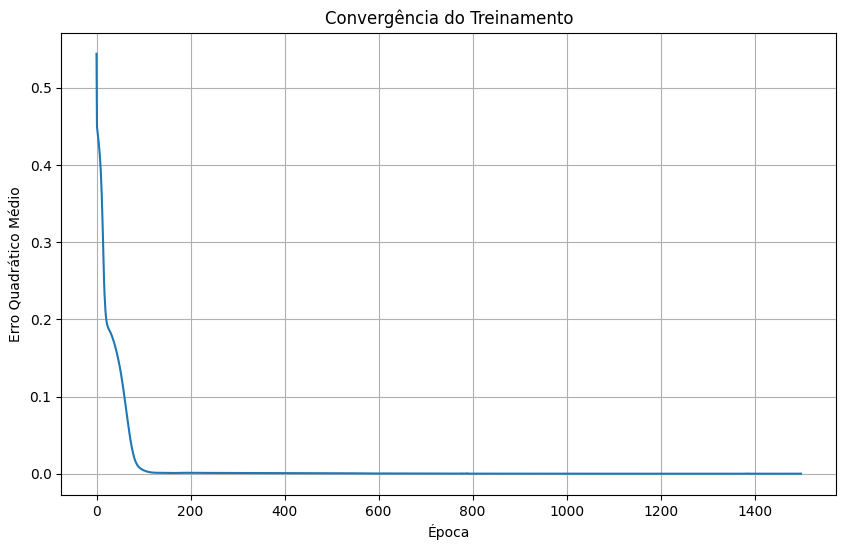

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dados de treinamento
x_train = np.linspace(0, 10, 1000)
y_train = np.sin(x_train)

# Construindo o modelo
model = Sequential([
    tf.keras.layers.Input(shape=(1,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento
history = model.fit(x_train, y_train, epochs=1500, batch_size=32, verbose=0)

# Dados de teste
x_test = np.linspace(0, 10, 100)
y_test = np.sin(x_test)
y_pred = model.predict(x_test)

# Visualização dos resultados
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Função Senoidal')
plt.plot(x_test, y_pred, "--", label='Aproximação do Modelo')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Aproximação de Função Senoidal')
plt.legend()
plt.grid(True)
plt.show()

# Visualizando a convergência do treinamento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.xlabel('Época')
plt.ylabel('Erro Quadrático Médio')
plt.title('Convergência do Treinamento')
plt.grid(True)
plt.show()

# Exercício: Testando Otimizadores para Aproximação de Função Não Linear


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


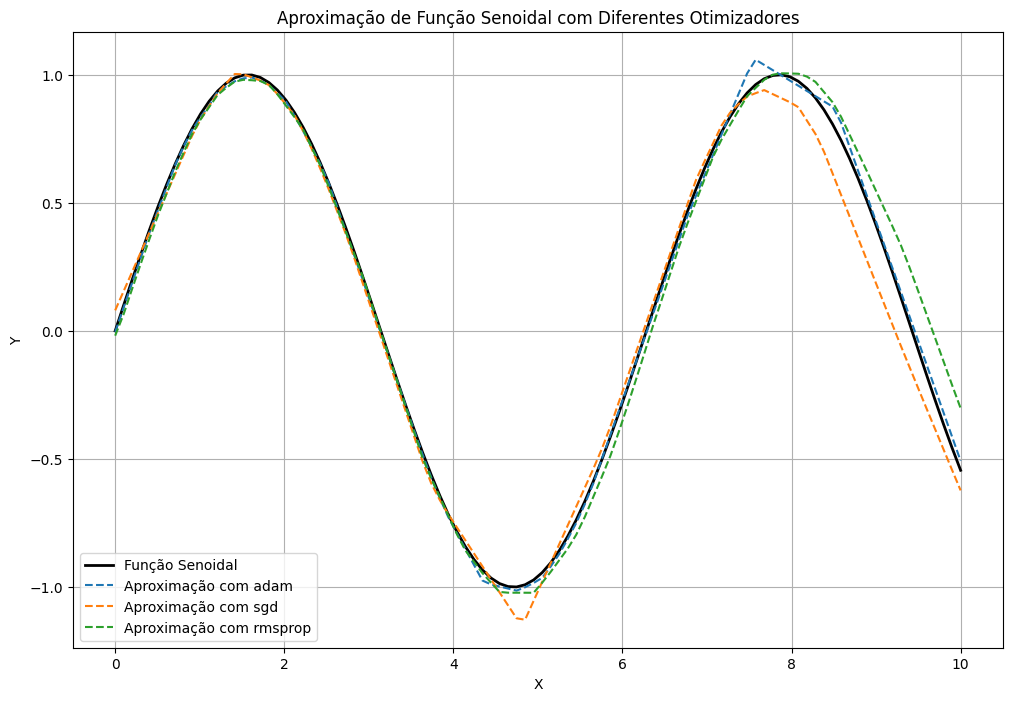

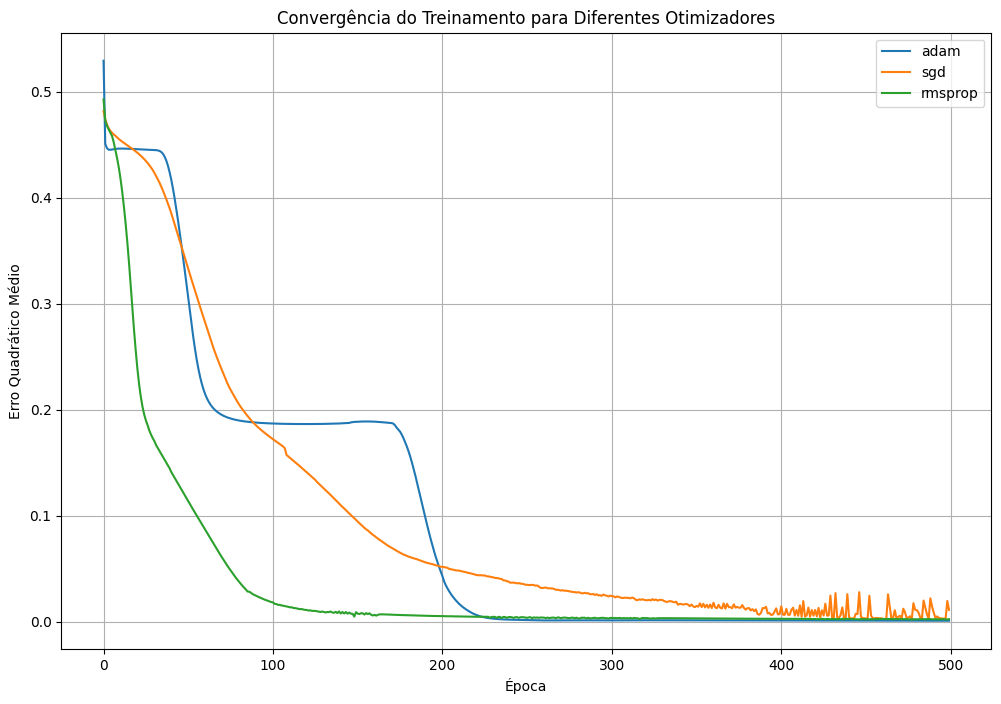

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definindo os dados de treino
x_train = np.linspace(0, 10, 1000)
y_train = np.sin(x_train)

# Função para criar e treinar o modelo com um otimizador específico
def train_model(optimizer_name):
    # Construir o modelo
    model = Sequential([
        tf.keras.layers.Input(shape=(1,)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    # Compilar o modelo com o otimizador especificado
    model.compile(optimizer=optimizer_name, loss='mean_squared_error')

    # Treinar o modelo
    history = model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)

    return model, history

# Lista de otimizadores para o teste
optimizers = ['adam', 'sgd', 'rmsprop']
histories = {}
models = {}

# Treinar o modelo e salvar os históricos de perda
for opt in optimizers:
    model, history = train_model(opt)
    models[opt] = model
    histories[opt] = history.history['loss']

# Gerando dados de teste
x_test = np.linspace(0, 10, 100)
y_test = np.sin(x_test)

# Visualização das aproximações da função seno
plt.figure(figsize=(12, 8))
plt.plot(x_test, y_test, label='Função Senoidal', color='black', linewidth=2)
for opt in optimizers:
    y_pred = models[opt].predict(x_test)
    plt.plot(x_test, y_pred, "--", label=f'Aproximação com {opt}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Aproximação de Função Senoidal com Diferentes Otimizadores')
plt.legend()
plt.grid(True)
plt.show()

# Visualização da convergência do treinamento (perda) para cada otimizador
plt.figure(figsize=(12, 8))
for opt in optimizers:
    plt.plot(histories[opt], label=f'{opt}')
plt.xlabel('Época')
plt.ylabel('Erro Quadrático Médio')
plt.title('Convergência do Treinamento para Diferentes Otimizadores')
plt.legend()
plt.grid(True)
plt.show()
